In [39]:
import pickle
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

import covid19sim

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

import sys
sys.path.append("../src/covid19sim/plotting/")
from plot_rt import PlotRt
from utils import plot_intervention

In [73]:
filenames_budget_0 = [
     "../data/budget_0/tracker_data_n_1000_seed_1007_20200523-212417_.pkl",
     "../data/budget_0/tracker_data_n_1000_seed_1008_20200523-212455_.pkl",
     "../data/budget_0/tracker_data_n_1000_seed_1009_20200523-212458_.pkl",
     "../data/budget_0/tracker_data_n_1000_seed_1010_20200523-212434_.pkl",
     "../data/budget_0/tracker_data_n_1000_seed_1011_20200523-212511_.pkl",
]

filenames_budget_10 = [
     "../data/budget_10/tracker_data_n_1000_seed_1007_20200523-185057_.pkl",
     "../data/budget_10/tracker_data_n_1000_seed_1008_20200523-185153_.pkl",
     "../data/budget_10/tracker_data_n_1000_seed_1009_20200523-185145_.pkl",
     "../data/budget_10/tracker_data_n_1000_seed_1010_20200523-185124_.pkl",
     "../data/budget_10/tracker_data_n_1000_seed_1011_20200523-185137_.pkl",
]
filenames_budget_100 = [
     "../data/budget_100/tracker_data_n_1000_seed_1007_20200523-195416_.pkl",
     "../data/budget_100/tracker_data_n_1000_seed_1008_20200523-195445_.pkl",
     "../data/budget_100/tracker_data_n_1000_seed_1009_20200523-195446_.pkl",
     "../data/budget_100/tracker_data_n_1000_seed_1010_20200523-195441_.pkl",
     "../data/budget_100/tracker_data_n_1000_seed_1011_20200523-195437_.pkl",
]

filenames_budget_500 = [
     "../data/budget_500/tracker_data_n_1000_seed_1007_20200523-223342_.pkl",
     "../data/budget_500/tracker_data_n_1000_seed_1008_20200523-223454_.pkl",
     "../data/budget_500/tracker_data_n_1000_seed_1009_20200523-223446_.pkl",
     "../data/budget_500/tracker_data_n_1000_seed_1010_20200523-223505_.pkl",
     "../data/budget_500/tracker_data_n_1000_seed_1011_20200523-223452_.pkl",
]

filenames = [filenames_budget_0, filenames_budget_10, filenames_budget_100, filenames_budget_500]

In [84]:
def get_rt(filenames, end_day=22):
    Rt = []
    for i, filename in enumerate(filenames):
        with open(filename, "rb") as f:
            data = pickle.load(f)

        output_r = data['R']
        for idx, r in enumerate(output_r):
            if r > 0:
                break

        cases_per_day = data['cases_per_day'] [:end_day+4]
        if data['serial_interval'] > 0:
            serial_interval = data['serial_interval']
        else:
            serial_interval = 7.0
            print("WARNING: serial_interval is 0")

        print(f"using serial interval :{serial_interval}")
        plotrt = PlotRt(R_T_MAX=4, sigma=0.25, GAMMA=1.0/serial_interval)
        most_likely, _ = plotrt.compute(cases_per_day, r0_estimate=2.5)
        Rt.append(most_likely[:end_day].tolist())

    Rt = pd.DataFrame(Rt).transpose()
    return Rt
rtdf_budget_0 = get_rt(filenames[0])
rtdf_budget_10 = get_rt(filenames[1])
rtdf_budget_100 = get_rt(filenames[2])
rtdf_budget_500 = get_rt(filenames[3])
budget_rts = [rtdf_budget_0, rtdf_budget_10, rtdf_budget_100, rtdf_budget_500]

using serial interval :7.0
using serial interval :7.0
using serial interval :7.0
using serial interval :7.0
using serial interval :5.914583333333334
using serial interval :5.855555555555555
using serial interval :6.470138888888889
using serial interval :5.1722222222222225
using serial interval :5.995833333333334
using serial interval :5.8875
using serial interval :7.0
using serial interval :7.0
using serial interval :7.0
using serial interval :7.0
using serial interval :7.48125
using serial interval :7.0
using serial interval :6.6038194444444445
using serial interval :7.8842592592592595
using serial interval :7.0
using serial interval :5.839236111111111


In [89]:
means = []
stds = []
for rt in budget_rts:
    means.append(rt.mean(axis=1))
    stds.append(rt.std(axis=1))

In [117]:
x = range(0, len(means[0]), 1)
x

range(0, 22)

<ErrorbarContainer object of 3 artists>

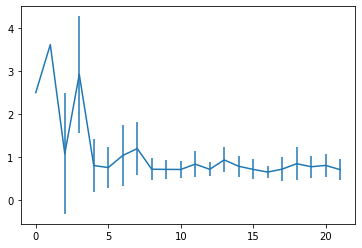

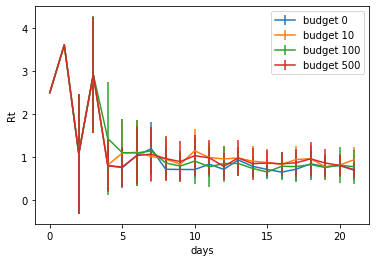

In [126]:
plt.errorbar(x, means[0], yerr=stds[0], label="budget 0")

plt.errorbar(x, means[1], yerr=stds[1], label="budget 10")
plt.errorbar(x, means[2], yerr=stds[2], label="budget 100")
plt.errorbar(x, means[3], yerr=stds[3], label="budget 500")
plt.legend()
plt.xlabel("days")
plt.ylabel("Rt")
plt.savefig("budgets")

TypeError: expected str, bytes or os.PathLike object, not list

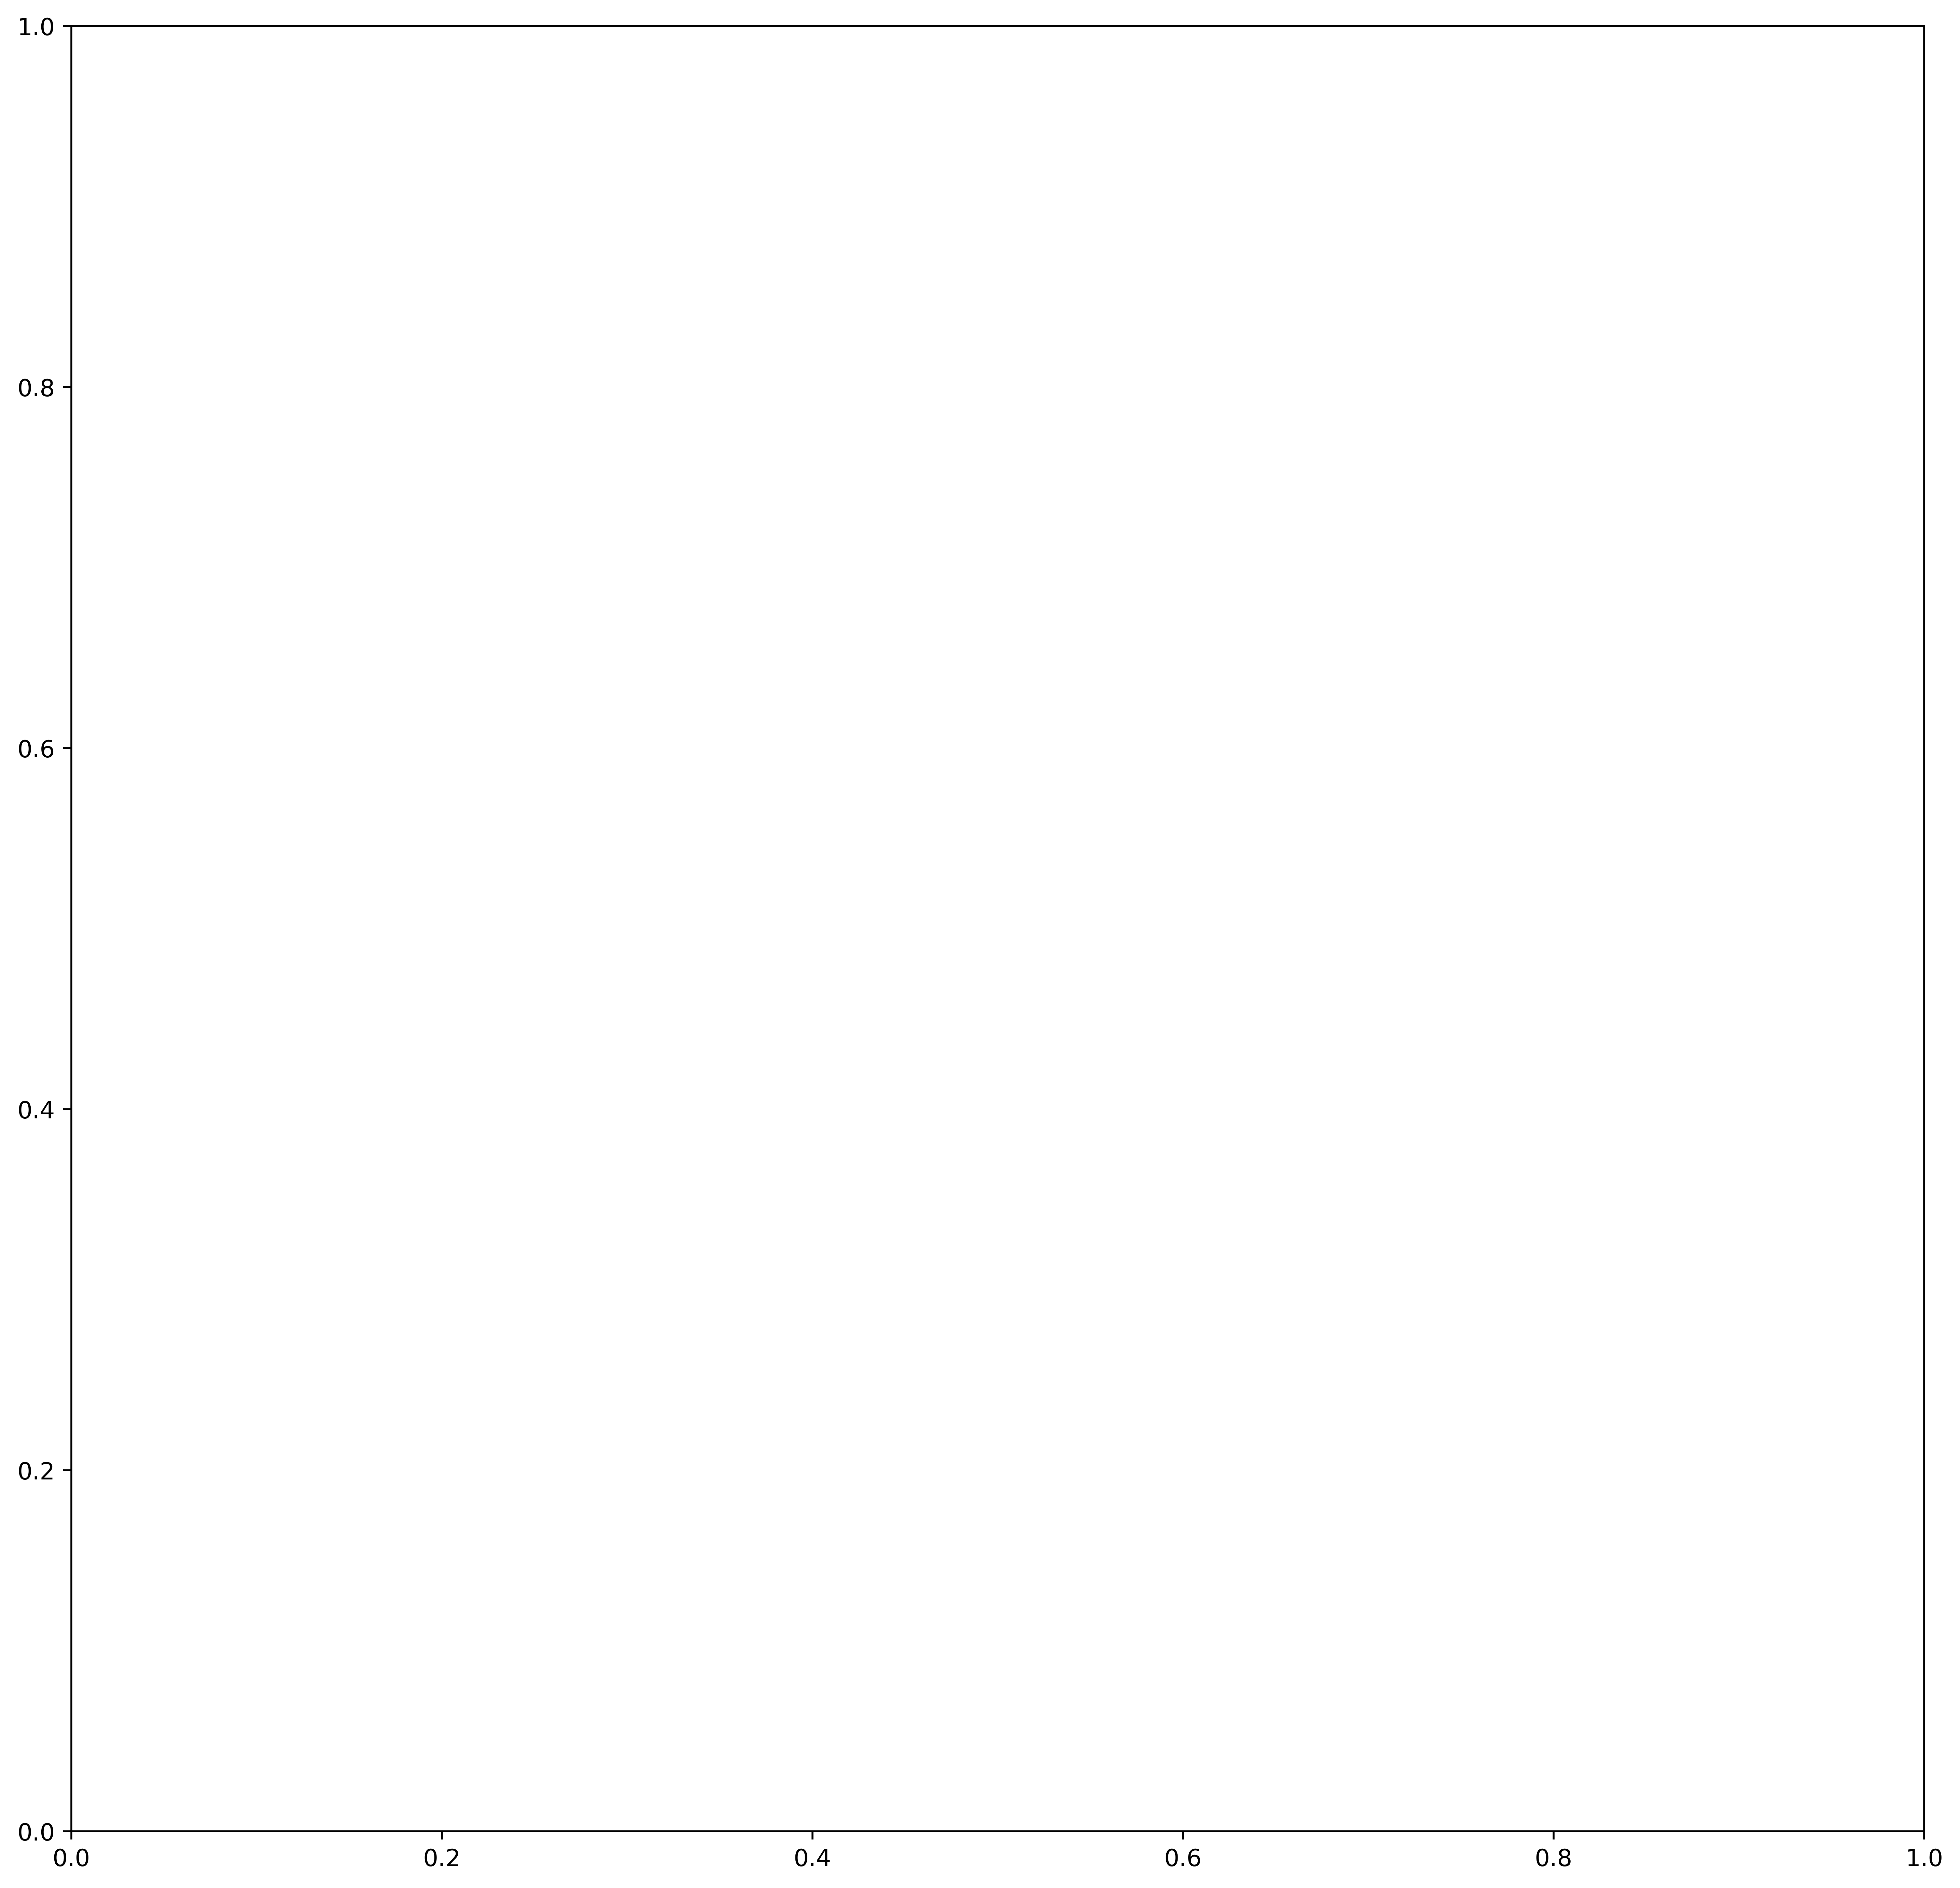

In [11]:
fig, ax = plt.subplots(figsize=(14,14), sharex=True, dpi=500)

for i, filename in enumerate(filenames):
    with open(filename, "rb") as f:
        data = pickle.load(f)
    n_init_infected = data['n_init_infected']
    n_humans = data['n_humans']

    cases_per_day = np.cumsum(data['cases_per_day'])[:end_day]
    cases_per_day += n_init_infected
    cases_per_day = cases_per_day / n_humans * 100
    cases.append(cases_per_day)

    mobile.append(data['outside_daily_contacts'][:end_day])

cases = pd.DataFrame(cases).transpose()

ax = plot_line_with_bounds(cases, ax, color, label)
if show_mobility:
    mobile = pd.DataFrame(mobile).transpose()
    dual_ax = plot_line_with_bounds(mobile, dual_ax, color, label, show_mobility=True, linestyle="--", alpha=0.3)

return ax, dual_ax
